In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("mlr.csv")

In [6]:
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


###correlation

In [11]:
corr = df.corr()["income"].sort_values(ascending = True)

In [13]:
corr

age           0.532204
experience    0.984227
income        1.000000
Name: income, dtype: float64

In [15]:
import seaborn as sns

In [17]:
corr_matrix = df.corr()

<Axes: >

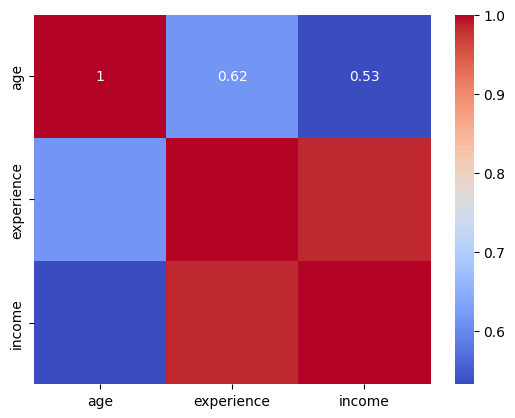

In [19]:
sns.heatmap(corr_matrix , cmap = "coolwarm" , annot = True)

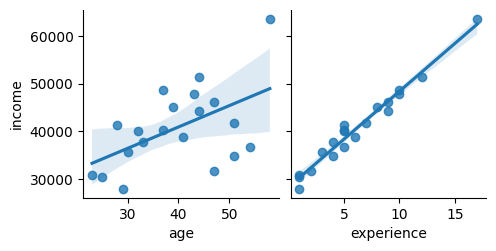

In [57]:
sns.pairplot(df,x_vars = df.columns.drop("income") , y_vars = "income",kind = "reg")

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
x = df.drop(columns = "income")
y = df["income"]

In [27]:
rand = RandomForestRegressor()

In [29]:
rand.fit(x,y)

RandomForestRegressor()

In [31]:
f_imp = pd.Series(rand.feature_importances_ , index = x.columns)

<Axes: >

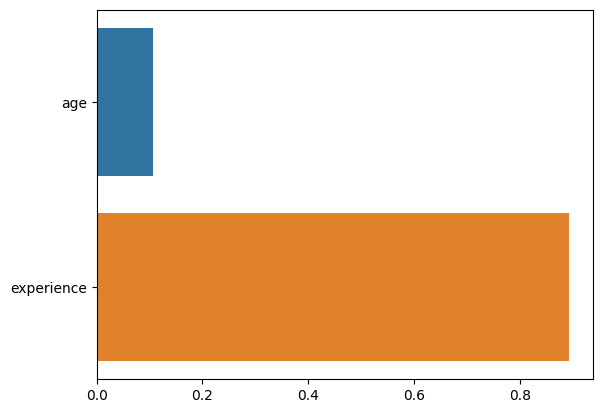

In [35]:
sns.barplot( x = f_imp.values , y = f_imp.index)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [39]:
lr = LinearRegression()

In [41]:
from sklearn.model_selection import train_test_split

In [43]:
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size = 0.25 , random_state = 42)

In [45]:
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(x_test)

In [51]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test , y_pred)

In [55]:
print(f"mean square error =  {mse:.2f}")

mean square error =  1264016.03


In [59]:
print(f"mean square error =  {r2:.2f}")

mean square error =  0.92


In [61]:
print(f"intercept =  {lr.intercept_:.2f}")

intercept =  31023.68


In [71]:
print(f"intercept =  {lr.coef_[[0,1]]}")

intercept =  [ -95.08384765 2164.65969115]


In [73]:
import numpy as np

In [79]:
sample = np.array([[35,6]])

In [83]:
pred = lr.predict(sample)

C:\Users\KISHORE\anaconda3\jupy\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [85]:
print(f"predicted =  {pred[0]:.2f}")

predicted =  40683.70


In [87]:
df

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830
5,51,7,41630
6,28,5,41340
7,33,4,37650
8,37,5,40250
9,39,8,45150
